In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
red_wine   = pd.read_csv('D:\\Chrome Downloads\winequality-red.csv',   sep=';')
white_wine = pd.read_csv('D:\\Chrome Downloads\winequality-white.csv', sep=';')

In [3]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [4]:
red_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
white_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


In [6]:
print("Red Wine's values are\t", sorted(red_wine['quality'].unique()))
print("White Wine's values are\t", sorted(white_wine['quality'].unique()))

Red Wine's values are	 [3, 4, 5, 6, 7, 8]
White Wine's values are	 [3, 4, 5, 6, 7, 8, 9]


In [7]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value : ('low' if value <= 5 else 'medium') if value <=7 else 'high')

In [8]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [9]:
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

In [10]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [11]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value : ('low' if value <= 5 else 'medium') if value<=7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])
white_wine.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,medium
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,medium


In [12]:
print(red_wine['quality_label'].value_counts())
print()
print(white_wine['quality_label'].value_counts())

medium    837
low       744
high       18
Name: quality_label, dtype: int64

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


In [13]:
wines = pd.concat([red_wine, white_wine], axis=0)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red,low
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,red,low
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red,low
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,red,medium
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red,low
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,red,low
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,red,low
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,red,medium
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,red,medium
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red,low


In [14]:
wines = wines.sample(frac = 1.0, random_state = 42).reset_index(drop='true')

#What is frac ??

wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


In [15]:
subset_attributes = ['residual sugar',        
                     'total sulfur dioxide',  
                     'sulphates',             
                     'alcohol',               
                     'volatile acidity',      
                     'quality']
rs = round(red_wine[subset_attributes].describe(),2)
rs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00
50%,2.20,38.00,0.62,10.20,0.52,6.00
75%,2.60,62.00,0.73,11.10,0.64,6.00
max,15.50,289.00,2.00,14.90,1.58,8.00


In [16]:
ws = round(white_wine[subset_attributes].describe(), 2)
ws

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00
50%,5.20,134.00,0.47,10.40,0.26,6.00
75%,9.90,167.00,0.55,11.40,0.32,6.00
max,65.80,440.00,1.08,14.20,1.10,9.00


In [17]:
pd.concat([rs, ws], axis=1, 
          keys=['💥 Red Wine Statistics', 
                '💫 White Wine Statistics'])
# how did he add red and white balls ??

💥 Red Wine Statistics                                          \
             residual sugar total sulfur dioxide sulphates  alcohol   
count               1599.00              1599.00   1599.00  1599.00   
mean                   2.54                46.47      0.66    10.42   
std                    1.41                32.90      0.17     1.07   
min                    0.90                 6.00      0.33     8.40   
25%                    1.90                22.00      0.55     9.50   
50%                    2.20                38.00      0.62    10.20   
75%                    2.60                62.00      0.73    11.10   
max                   15.50               289.00      2.00    14.90   

                                💫 White Wine Statistics                       \
      volatile acidity  quality          residual sugar total sulfur dioxide   
count          1599.00  1599.00                 4898.00              4898.00   
mean              0.53     5.64                    6.39               138.36   
std               0.18     0.81                    5.07                42.50   
min               0.12     3.00                    0.60                 9.00   
25%               0.39     5.00                    1.70               108.00   
50%               0.52     6.00                    5.20               134.00   
75%               0.64     6.00                    9.90               167.00   
max               1.58     8.00                   65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [18]:
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
ls


,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,2384.00,2384.00,2384.00,2384.00,2384.00,2384.00
mean,5.65,119.28,0.52,9.87,0.40,4.88
std,4.92,61.89,0.14,0.84,0.19,0.36
min,0.60,6.00,0.25,8.00,0.10,3.00
25%,1.80,68.00,0.44,9.30,0.26,5.00
50%,2.90,124.00,0.50,9.60,0.34,5.00
75%,8.52,167.00,0.58,10.40,0.50,5.00
max,23.50,440.00,2.00,14.90,1.58,5.00


In [19]:
ms

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,3915.00,3915.00,3915.00,3915.00,3915.00,3915.00
mean,5.32,113.51,0.54,10.81,0.31,6.28
std,4.68,53.57,0.15,1.20,0.14,0.45
min,0.70,6.00,0.22,8.40,0.08,6.00
25%,1.80,81.00,0.43,9.80,0.21,6.00
50%,3.00,116.00,0.51,10.80,0.27,6.00
75%,7.90,150.00,0.61,11.70,0.36,7.00
max,65.80,294.00,1.95,14.20,1.04,7.00


In [20]:
hs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,198.00,198.00,198.00,198.00,198.00,198.00
mean,5.35,117.48,0.51,11.69,0.29,8.03
std,4.16,41.69,0.16,1.27,0.12,0.16
min,0.80,12.00,0.25,8.50,0.12,8.00
25%,2.00,96.00,0.38,11.00,0.21,8.00
50%,4.05,118.50,0.48,12.00,0.28,8.00
75%,7.57,145.00,0.60,12.60,0.35,8.00
max,14.80,212.50,1.10,14.00,0.85,9.00


In [21]:
pd.concat([ls, ms, hs], axis=1, keys = ['👎Low Quality', '👌Medium Quality', '👍High Quality'])

👎Low Quality                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        2384.00              2384.00   2384.00  2384.00          2384.00   
mean            5.65               119.28      0.52     9.87             0.40   
std             4.92                61.89      0.14     0.84             0.19   
min             0.60                 6.00      0.25     8.00             0.10   
25%             1.80                68.00      0.44     9.30             0.26   
50%             2.90               124.00      0.50     9.60             0.34   
75%             8.52               167.00      0.58    10.40             0.50   
max            23.50               440.00      2.00    14.90             1.58   

               👌Medium Quality                                          \
       quality  residual sugar total sulfur dioxide sulphates  alcohol   
count  2384.00         3915.00              3915.00   3915.00  3915.00   
mean      4.88            5.32               113.51      0.54    10.81   
std       0.36            4.68                53.57      0.15     1.20   
min       3.00            0.70                 6.00      0.22     8.40   
25%       5.00            1.80                81.00      0.43     9.80   
50%       5.00            3.00               116.00      0.51    10.80   
75%       5.00            7.90               150.00      0.61    11.70   
max       5.00           65.80               294.00      1.95    14.20   

                                 👍High Quality                                 \
      volatile acidity  quality residual sugar total sulfur dioxide sulphates   
count          3915.00  3915.00         198.00               198.00    198.00   
mean              0.31     6.28           5.35               117.48      0.51   
std               0.14     0.45           4.16                41.69      0.16   
min               0.08     6.00           0.80                12.00      0.25   
25%               0.21     6.00           2.00                96.00      0.38   
50%               0.27     6.00           4.05               118.50      0.48   
75%               0.36     7.00           7.57               145.00      0.60   
max               1.04     7.00          14.80               212.50      1.10   

                                        
      alcohol volatile acidity quality  
count  198.00           198.00  198.00  
mean    11.69             0.29    8.03  
std      1.27             0.12    0.16  
min      8.50             0.12    8.00  
25%     11.00             0.21    8.00  
50%     12.00             0.28    8.00  
75%     12.60             0.35    8.00  
max     14.00             0.85    9.00

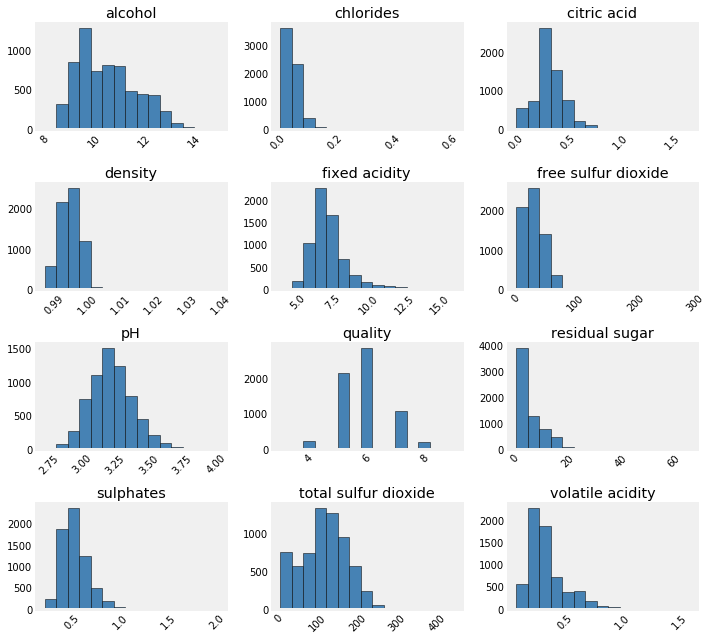

In [22]:
fig = wines.hist(bins = 15, 
                 color = 'steelblue', 
                 edgecolor='black', 
                 xlabelsize =10, 
                 ylabelsize =10,
                 xrot = 45,
                 yrot = 0,
                 grid = False,
                figsize = (10,9))
plt.tight_layout()

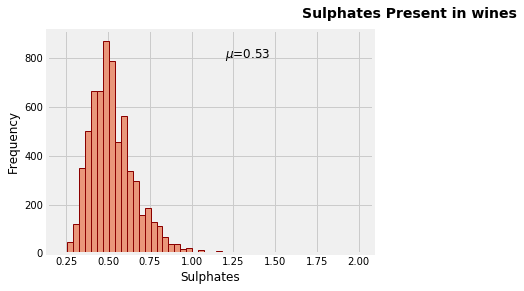

In [39]:
fig = plt.figure(figsize= (12,4))
title = fig.suptitle("Sulphates Present in wines", fontsize= 14, fontweight= 'bold')
fig.subplots_adjust(top = 0.9, wspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(x = 1.2,
           y = 800,
           s = r'$\mu$='+ str(round(wines['sulphates'].mean(),2)),
           fontsize = 12)
hehe = ax.hist(wines['sulphates'],
                              bins = 50,
                              color = 'darksalmon',
                              edgecolor = 'darkred',
                              linewidth = 1.0)

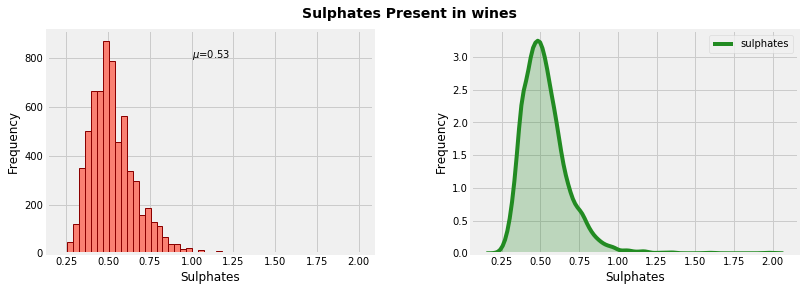

In [51]:
fig = plt.figure(figsize = (12,4))
title = fig.suptitle('Sulphates Present in wines', fontsize = 14, fontweight = 'bold')
fig.subplots_adjust(top = 0.9, wspace = 0.3)

ax = fig.add_subplot(1,2,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(x = 1, 
        y = 800,
        s = r'$\mu$='+ str(round(wines['sulphates'].mean(),2)))
hehe = ax.hist( wines['sulphates'],
                bins = 50,
                color = 'salmon',
                edgecolor = 'darkred',
                linewidth = 1.0)
ax2 = fig.add_subplot(1,2,2)
#ax2 = ax.twinx()
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
sns.kdeplot(wines['sulphates'], color = 'forestgreen', ax = ax2, shade = True)


In [55]:
w_q = wines['quality'].value_counts()
w_q

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [56]:
w_q = (list(w_q.index),list(w_q.values))

In [57]:
w_q

([6, 5, 7, 4, 8, 3, 9], [2836, 2138, 1079, 216, 193, 30, 5])

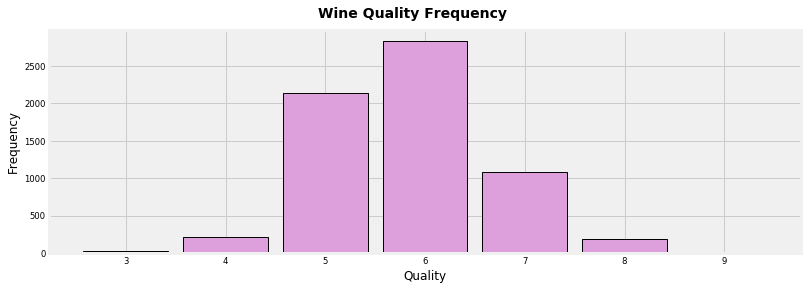

In [58]:
fig = plt.figure(figsize=(12,4))
title = fig.suptitle('Wine Quality Frequency', fontsize = 14, fontweight = 'bold')
fig.subplots_adjust(top=0.9, wspace=0.3) 

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Quality')
ax.set_ylabel('Frequency')
ax.tick_params(axis = 'both', which='both',labelsize=8.5)

bar = ax.bar(w_q[0],
             w_q[1],
             width = 0.85,
             color = 'plum',
             edgecolor = 'black',
            linewidth = 1)